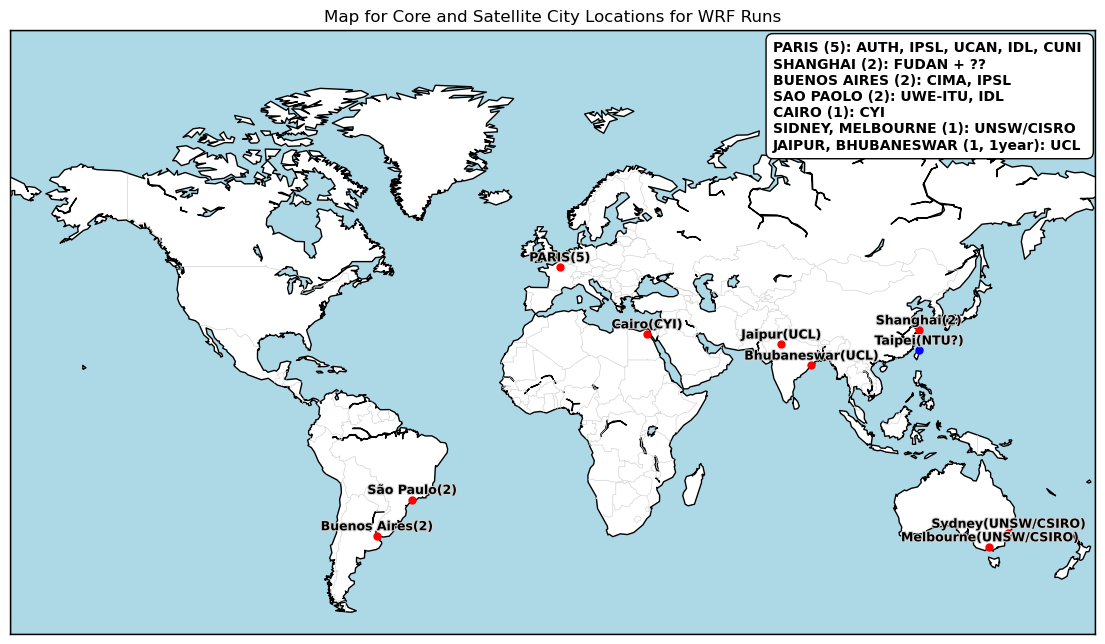

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.patheffects as path_effects

# Define city coordinates (longitude, latitude)
cities = {
    'São Paulo(2)': (-46.6333, -23.5505),
    'Bhubaneswar(UCL)': (85.8245, 20.2961),
    'Jaipur(UCL)': (75.7873, 26.9124),
    'Buenos Aires(2)': (-58.3816, -34.6037),
    'Cairo(CYI)': (31.2357, 30.0444),
    'Melbourne(UNSW/CSIRO)': (144.9631, -37.8136),
    'Sydney(UNSW/CSIRO)': (151.2093, -33.8688),
    'Shanghai(2)': (121.4737, 31.2304),
    'Taipei(NTU?)': (121.5654, 25.0330),
    'PARIS(5)': (2.3522, 48.8566)
}

# Create the map
plt.figure(figsize=(14, 8))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, resolution='c')

m.drawcoastlines()
m.drawcountries(color='lightgrey')
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='white', lake_color='lightblue')

# Plot cities
for city, (lon, lat) in cities.items():
    x, y = m(lon, lat)
    if "?" in city:
        m.plot(x, y, 'bo', markersize=5)
    else:
        m.plot(x, y, 'ro', markersize=5)   

    #plt.text(x + 500000, y + 100000, city, fontsize=10, fontweight='bold', ha='right', va='bottom')
    
    text = plt.text(x+ 10000, y + 100000, city, fontsize=9, fontweight='bold', ha='center', va='bottom')
    text.set_path_effects([path_effects.Stroke(linewidth=1.52, foreground='lightgrey'),
                           path_effects.Normal()])
    
# Add custom legend text
legend_text = (
    "PARIS (5): AUTH, IPSL, UCAN, IDL, CUNI \n"
    "SHANGHAI (2): FUDAN + ?? \n"
    "BUENOS AIRES (2): CIMA, IPSL\n"
    "SAO PAOLO (2): UWE-ITU, IDL\n"
    "CAIRO (1): CYI\n"
    "SIDNEY, MELBOURNE (1): UNSW/CISRO\n"
    "JAIPUR, BHUBANESWAR (1, 1year): UCL"   
)

# Add the legend as a text box
plt.gcf().text(0.67, 0.72, legend_text, fontsize=10,
               fontweight='bold', va='bottom', ha='left',
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.title("Map for Core and Satellite City Locations for WRF Runs")
plt.savefig('STAGE-1_cities.png')  # You can also save it as a PDF, SVG, etc.
plt.show()

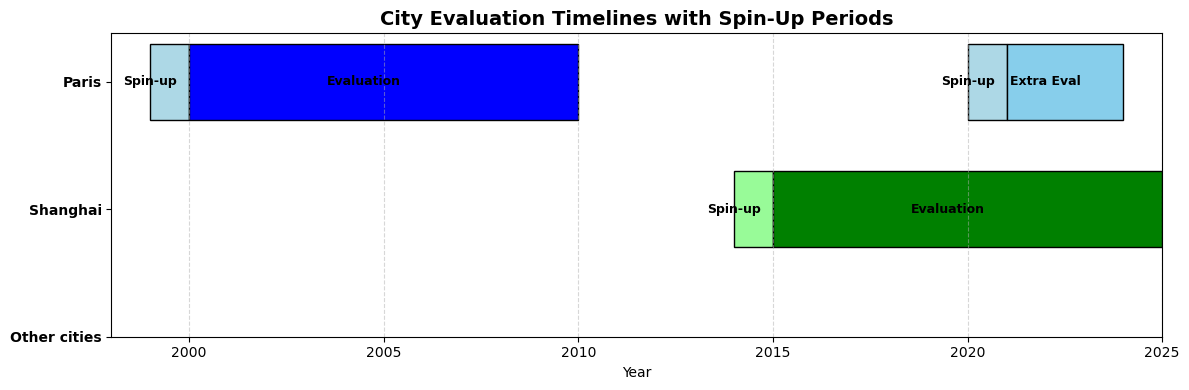

In [22]:
import matplotlib.pyplot as plt

# Grouped timeline data: (city, label, start, end, color)
periods = [
    ("Paris", "Spin-up", 1999, 1999, 'lightblue'),
    ("Paris", "Evaluation", 2000, 2009, 'blue'),
    ("Paris", "Spin-up", 2020, 2020, 'lightblue'),
    ("Paris", "Extra Eval", 2021, 2023, 'skyblue'),
    ("Shanghai", "Spin-up", 2014, 2014, 'palegreen'),
    ("Shanghai", "Evaluation", 2015, 2024, 'green'),
    #("Other cities", "TBD", 1999, 2023, 'gray')
]

# Unique city order for plotting
cities = ["Paris", "Shanghai", "Other cities"]
city_y = {city: i for i, city in enumerate(reversed(cities))}  # Reverse for top-to-bottom

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 4))

# Plot bars on same line per city
for city, label, start, end, color in periods:
    y = city_y[city]
    ax.barh(y, end - start + 1, left=start, height=0.6, color=color, edgecolor='black')
    ax.text((start + end) / 2, y, label, va='center', ha='center', color='black', fontsize=9, fontweight='bold')

# Formatting
ax.set_yticks(list(city_y.values()))
ax.set_yticklabels(list(city_y.keys()), fontweight='bold')
ax.set_xlabel("Year")
ax.set_xlim(1998, 2025)
ax.set_title("City Evaluation Timelines with Spin-Up Periods", fontsize=14, fontweight='bold')
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

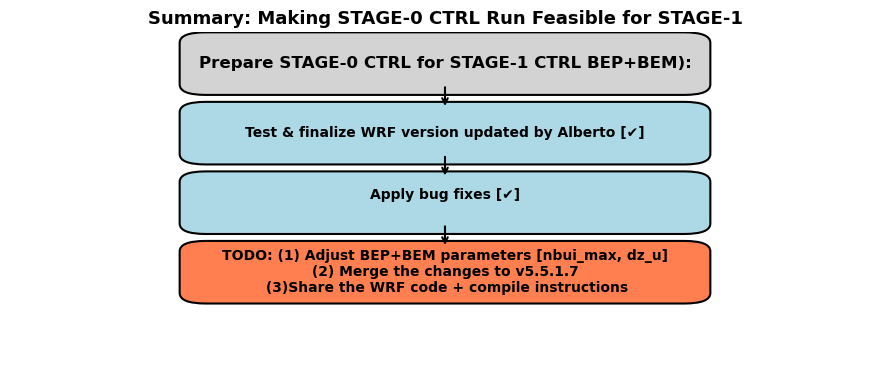

In [41]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

def draw_box(ax, xy, text, width=5.5, height=1.2, fontsize=10, fc="lightblue"):
    box = FancyBboxPatch(xy, width, height,
                         boxstyle="round,pad=0.3", fc=fc, ec="black", lw=1.5)
    ax.add_patch(box)
    ax.text(xy[0] + width / 2, xy[1] + height / 2, text,
            ha='center', va='center', fontsize=fontsize, fontweight='bold', wrap=True)

# Create the plot
fig, ax = plt.subplots(figsize=(9, 4))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Boxes and their positions
draw_box(ax, (2.25, 8.5), "Prepare STAGE-0 CTRL for STAGE-1 CTRL BEP+BEM):", fontsize=12, fc="lightgray")
draw_box(ax, (2.25, 6.5), "Test & finalize WRF version updated by Alberto [✔]")
draw_box(ax, (2.25, 4.5), "Apply bug fixes [✔]\n") 
draw_box(ax, (2.25, 2.5), "TODO: (1) Adjust BEP+BEM parameters [nbui_max, dz_u]\n (2) Merge the changes to v5.5.1.7 \n (3)Share the WRF code + compile instructions",  fc="coral")

# Arrows between boxes
arrow_props = dict(arrowstyle='->', lw=1.5, color='black')
for y in [7.8,  5.8,  3.8]:
    ax.annotate('', xy=(5, y), xytext=(5, y + 0.7), arrowprops=arrow_props)

plt.title("Summary: Making STAGE-0 CTRL Run Feasible for STAGE-1", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()